In [25]:
import numpy as np
import scipy.fftpack as fft
import matplotlib.pyplot as plt

# Definition

The discrete Fourier transofrm is defined as:
$$
X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-i 2\pi k n / N}
$$
while the inverse discrete Fourier transform is defined as:
$$
x_n = \frac{1}{N} \sum_{k=0}^{N-1} X_k \cdot e^{i 2\pi k n / N}
$$

In [30]:
t = 0.1
omega = 2*np.pi/t
N = 100
x = np.linspace(0, t, N)
y = np.sin(omega*x)

N = y.shape[0]
N

100

In [31]:
n = np.arange(N)
k = n.reshape((N, 1))
# k, n

In [21]:
k*n

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    1,    2, ...,   97,   98,   99],
       [   0,    2,    4, ...,  194,  196,  198],
       ...,
       [   0,   97,  194, ..., 9409, 9506, 9603],
       [   0,   98,  196, ..., 9506, 9604, 9702],
       [   0,   99,  198, ..., 9603, 9702, 9801]])

In [22]:
M = np.exp(-2j * np.pi * k * n / N)
M

array([[1.        +0.j        , 1.        +0.j        ,
        1.        +0.j        , ..., 1.        +0.j        ,
        1.        +0.j        , 1.        +0.j        ],
       [1.        +0.j        , 0.99802673-0.06279052j,
        0.9921147 -0.12533323j, ..., 0.98228725+0.18738131j,
        0.9921147 +0.12533323j, 0.99802673+0.06279052j],
       [1.        +0.j        , 0.9921147 -0.12533323j,
        0.96858316-0.24868989j, ..., 0.92977649+0.36812455j,
        0.96858316+0.24868989j, 0.9921147 +0.12533323j],
       ...,
       [1.        +0.j        , 0.98228725+0.18738131j,
        0.92977649+0.36812455j, ..., 0.84432793-0.53582679j,
        0.92977649-0.36812455j, 0.98228725-0.18738131j],
       [1.        +0.j        , 0.9921147 +0.12533323j,
        0.96858316+0.24868989j, ..., 0.92977649-0.36812455j,
        0.96858316-0.24868989j, 0.9921147 -0.12533323j],
       [1.        +0.j        , 0.99802673+0.06279052j,
        0.9921147 +0.12533323j, ..., 0.98228725-0.18738131j,
 

In [23]:
def DFT_slow(x):
    """Compute the discrete Fourier Transform of the 1D array x"""
    x = np.asarray(x, dtype=float)
    N = x.shape[0]
    n = np.arange(N)
    k = n.reshape((N, 1))
    M = np.exp(-2j * np.pi * k * n / N)
    return np.dot(M, x)

In [24]:
np.abs(DFT_slow(x))

array([250.        ,  80.3945081 ,  40.21709876,  26.83346918,
        20.14830746,  16.14255864,  13.47654397,  11.57612085,
        10.15422281,   9.05137286,   8.17188883,   7.45488584,
         6.8597775 ,   6.35846894,   5.9308956 ,   5.56234663,
         5.24179194,   4.96079974,   4.71281494,   4.49266537,
         4.2962162 ,   4.12012313,   3.96165279,   3.81855015,
         3.68893901,   3.57124637,   3.46414431,   3.36650481,
         3.27736421,   3.19589509,   3.12138378,   3.05321223,
         2.99084331,   2.93380879,   2.8816995 ,   2.83415717,
         2.79086762,   2.75155521,   2.71597805,   2.68392405,
         2.65520764,   2.62966691,   2.60716129,   2.58756958,
         2.57078825,   2.55673012,   2.54532316,   2.53650964,
         2.53024539,   2.5264992 ,   2.52525253,   2.5264992 ,
         2.53024539,   2.53650964,   2.54532316,   2.55673012,
         2.57078825,   2.58756958,   2.60716129,   2.62966691,
         2.65520764,   2.68392405,   2.71597805,   2.75

(0.0, 10.0)

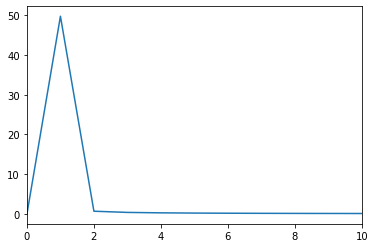

In [32]:
plt.plot(k, np.abs(DFT_slow(y)))
plt.xlim(0, 10)